In [1]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
#import matplotlib.dates as mdates
from matplotlib import dates

In [2]:
data = [
    [ "1.03.2020", 0, 2, 0, 0 ],
    [ "2.03.2020", 1, 3, 0, 0 ],
    [ "3.03.2020", 1, 3, 0, 0 ],
    [ "4.03.2020", 1, 3, 0, 0],
    [ "5.03.2020", 1, 4, 0, 0],
    [ "6.03.2020", 6, 10, 0, 0],
    [ "7.03.2020", 6, 14, 0, 0],
    [ "8.03.2020", 6, 17, 0, 0],
    [ "9.03.2020", 9, 20, 0, 0],
    [ "10.03.2020", 9, 20, 0, 0],
    [ "11.03.2020", 15, 28, 0, 0],
    [ "12.03.2020", 19, 34, 0, 0],
    [ "13.03.2020", 24, 54, 0, 0],
    [ "14.03.2020", 33, 59, 0, 0],
    [ "15.03.2020", 33, 63, 0, 0],
    [ "16.03.2020", 53, 93, 0, 0],
    [ "17.03.2020", 56, 117, 0, 0],
    [ "18.03.2020", 86, 147, 0, 0],
    [ "19.03.2020", 98, 199, 0, 0],
    [ "20.03.2020", 131, 253, 0, 0],
    [ "21.03.2020", 137, 306, 0, 0],
    [ "22.03.2020", 191, 367, 0, 0],
    [ "23.03.2020", 262, 438, 0, 0],
    [ "24.03.2020", 290, 495, 0, 0],
    [ "25.03.2020", 410, 658, 2, 2],
    [ "26.03.2020", 546, 840, 2, 2],
    [ "27.03.2020", 703, 1036, 4, 4],
    [ "28.03.2020", 817, 1264, 4, 4],
    [ "29.03.2020", 1014, 1534, 6, 8],
    [ "30.03.2020", 1226, 1836, 6, 9],
    [ "31.03.2020", 1613, 2337, 11, 17],
    [ "1.04.2020",  1880, 2777, 16, 24],
    [ "2.04.2020",  2475, 3548, 19, 30],
    [ "3.04.2020",  2923, 4149, 20, 34],
]

df = pd.DataFrame.from_records(data)
df.columns = ['date', 'Moscow', 'Russia', 'death_in_Moscow', 'death_in_Russia']
df['date'] = pd.to_datetime(df.date, format='%d.%m.%Y')
df["Moscow_log"] = np.log(df["Moscow"])
df["Russia_log"] = np.log(df["Russia"])


/Users/igor/src/python/env/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


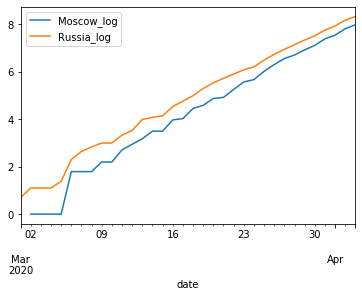

In [3]:
df.plot("date", ["Moscow_log", "Russia_log"])


In [4]:
df.head(10)

,date,Moscow,Russia,death_in_Moscow,death_in_Russia,Moscow_log,Russia_log
0,2020-03-01,0,2,0,0,-inf,0.693147
1,2020-03-02,1,3,0,0,0.000000,1.098612
2,2020-03-03,1,3,0,0,0.000000,1.098612
3,2020-03-04,1,3,0,0,0.000000,1.098612
4,2020-03-05,1,4,0,0,0.000000,1.386294
5,2020-03-06,6,10,0,0,1.791759,2.302585
6,2020-03-07,6,14,0,0,1.791759,2.639057
7,2020-03-08,6,17,0,0,1.791759,2.833213
8,2020-03-09,9,20,0,0,2.197225,2.995732
9,2020-03-10,9,20,0,0,2.197225,2.995732


In [23]:
# Rewrite outr linear model y_i = a * x_i + b to matrix form: A * p = y, where p = [a, b], y = [y_1; y_2; ...; y_n],
# A = [  0, 1;
#        1, 1;  
#        2, 1;
#        3, 1;   
#        ...
#        n, 1
#     ]
# where n is number of days

A = np.vstack( [ np.linspace(0, len(df)-1, len(df)),
                 np.ones(len(df))
               ]).T

In [24]:
#Ordinry Least Squares 

y = df["Russia_log"]   

olsmod = sm.OLS(y, A)
olsres = olsmod.fit()
olsres.summary()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:             Russia_log   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     4119.
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           2.18e-35
Time:                        17:29:15   Log-Likelihood:                 6.5511
No. Observations:                  34   AIC:                            -9.102
Df Residuals:                      32   BIC:                            -6.049
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2308      0.004     64.180      0.0

In [25]:
# Weighted Least Squares 

gamma = 0.93
weights = gamma ** np.abs(df.index.values - df.index.values[-1])
mod_wls = sm.WLS(y, A, weights)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:             Russia_log   R-squared:                       0.995
Model:                            WLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6024.
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           5.18e-38
Time:                        17:29:19   Log-Likelihood:                 14.895
No. Observations:                  34   AIC:                            -25.79
Df Residuals:                      32   BIC:                            -22.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2226      0.003     77.614      0.0

In [26]:
#Predictions
N = 5 # Number of days to future


dt_i = pd.date_range(start=df["date"][0], periods= len(df) + N, freq='D')

A = np.vstack( [ np.linspace(0, len(df) + N - 1, len(df) + N),
                 np.ones(len(df) + N)
               ]).T

#y_pred = olsres.predict(A)
y_pred = res_wls.predict(A) 

In [27]:
predicted_y = pd.DataFrame(dt_i, columns=["date"])
predicted_y["Russia_log_predicted"] = olsres.predict(A)
predicted_y["three_sigma_plus"] = predicted_y["Russia_log_predicted"] + 3*np.sqrt( ( np.linspace(0, len(df) + N - 1, len(df) + N) * olsres.bse[0]) **2 + olsres.bse[1]**2)
predicted_y["three_sigma_minus"] = predicted_y["Russia_log_predicted"] - 3*np.sqrt( ( np.linspace(0, len(df) + N - 1, len(df) + N) * olsres.bse[0]) **2 + olsres.bse[1]**2)                                  
predicted_y.head()


,date,Russia_log_predicted,three_sigma_plus,three_sigma_minus
0,2020-03-01,0.944579,1.151663,0.737494
1,2020-03-02,1.175365,1.382730,0.967999
2,2020-03-03,1.406151,1.614356,1.197945
3,2020-03-04,1.636937,1.846535,1.427339
4,2020-03-05,1.867723,2.079256,1.656190


Text(0.5, 1.0, 'Linear fit log COVID Russia')

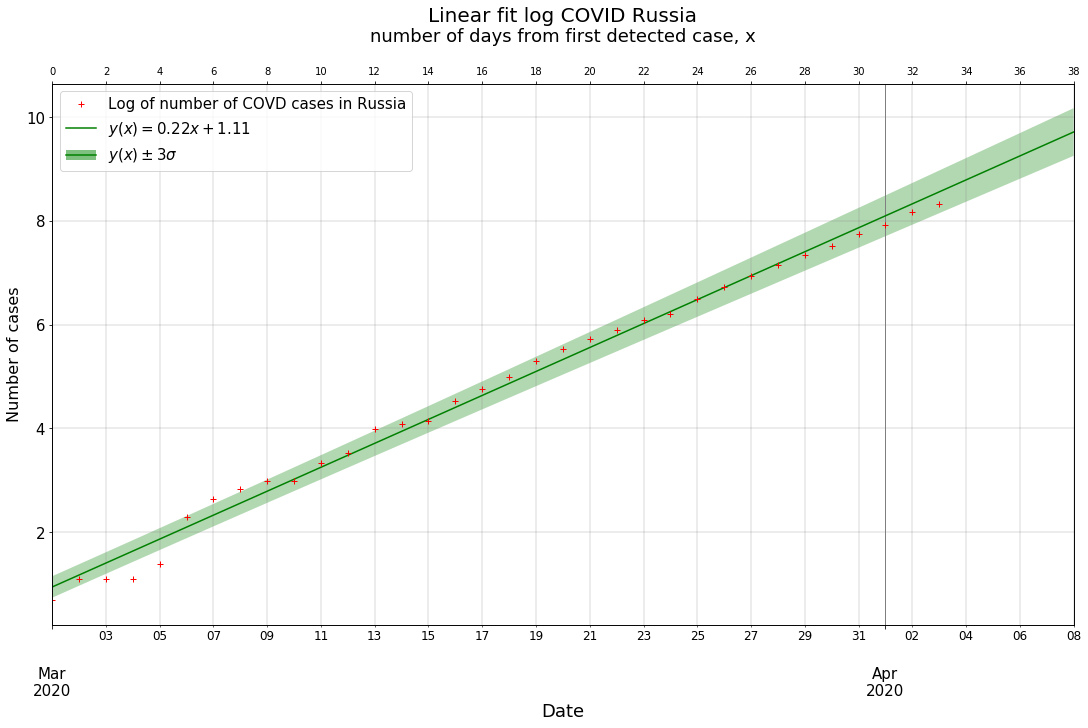

In [28]:
start_day = 0

fig, ax = plt.subplots(1, 1, figsize=(15,10), constrained_layout=True)
p1 = ax.plot(predicted_y["date"], predicted_y["Russia_log_predicted"], color="green")     
ax.fill_between(predicted_y["date"],
                predicted_y["three_sigma_minus"],
                predicted_y["three_sigma_plus"],
                facecolor='green', alpha=0.3, label='mean population 1')

p2 = ax.fill(np.NaN, np.NaN, 'g', alpha=0.5)

p3 = ax.plot(df["date"], df["Russia_log"], linestyle="", marker="+", color="red")

ax.legend( [p3[0], p1[0], (p2[0], p1[0])], ["Log of number of COVD cases in Russia", 
                                            r"$y(x) = {:.2f} x + {:.2f}$".format(res_wls.params["x1"], res_wls.params["const"]),
                                            r'$y(x)\pm3\sigma$' ],  prop={"size":15})


plt.xlim(predicted_y["date"].iloc[start_day], predicted_y["date"].iloc[-1]) 
ax.xaxis.set_minor_locator(dates.DayLocator(interval=2))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# Set major ticks with month names
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%b\n%Y'))

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.grid( which = "both", color='gray', linewidth=0.3, )
plt.grid(which = 'major', axis = 'x', color='gray', linewidth=1)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of cases', fontsize=16)

ax2 = ax.twiny()
ax2.set_xticks([i for i in predicted_y.index.values if not i % 2])
ax2.set_xlabel('number of days from first detected case, x\n', fontsize=18)
ax2.set_xlim([start_day, len(predicted_y) - 1])

ax.set_title('Linear fit log COVID Russia', fontsize=20)


Text(0.5, 1.0, 'Exp fit COVID Russia\n')

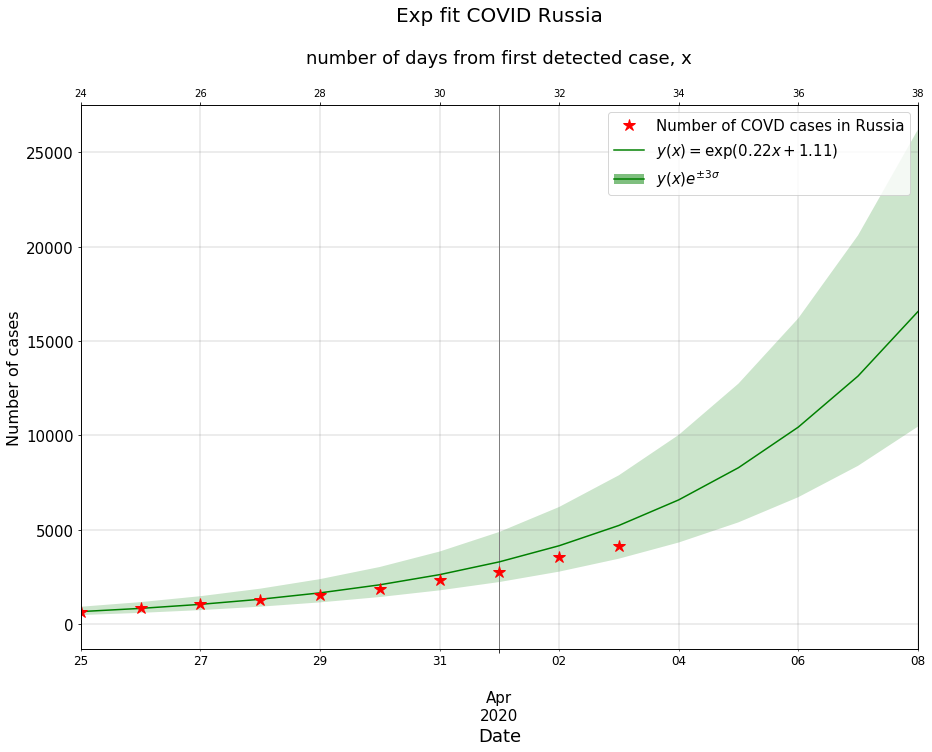

In [29]:
dt_i = pd.date_range(start=df["date"][0], periods= len(df) + N, freq='D')

A = np.vstack( [ np.linspace(0, len(df) + N - 1, len(df) + N),
                 np.ones(len(df) + N)
               ]).T

y_pred = olsres.predict(A)

new_y = pd.DataFrame(dt_i, columns=["date"])
new_y["Russia_predicted"] = np.exp(olsres.predict(A))
new_y["three_sigma_plus"] = np.exp(olsres.predict(A) + 3*np.sqrt( ( np.linspace(0, len(df) + N - 1, len(df) + N) * olsres.bse[0]) **2 + olsres.bse[1]**2))
new_y["three_sigma_minus"] = np.exp(olsres.predict(A) - 3*np.sqrt( ( np.linspace(0, len(df) + N - 1, len(df) + N) * olsres.bse[0]) **2 + olsres.bse[1]**2))                                
#predicted_y.head(10)

fig, ax = plt.subplots(1, 1, figsize=(15,10))


p1 = ax.plot(new_y["date"], new_y["Russia_predicted"], color="green")     
ax.fill_between(new_y["date"],
                new_y["three_sigma_minus"],
                new_y["three_sigma_plus"],
                facecolor='green', alpha=0.2, label='mean population 1')

p2 = ax.fill(np.NaN, np.NaN, 'g', alpha=0.5)

p3 = ax.plot(df["date"], df["Russia"], linestyle="", marker="*", color="red", markersize=12)

ax.legend( [p3[0], p1[0], (p2[0], p1[0])], ["Number of COVD cases in Russia", 
                                            r"$y(x) = \exp({:.2f} x + {:.2f})$".format(res_wls.params["x1"], res_wls.params["const"]),
                                            r"$y(x)e^{\pm3\sigma}$"],
                                            prop={"size":15})


start_day = 24

plt.xlim(new_y["date"].iloc[start_day], new_y["date"].iloc[-1]) 
ax.xaxis.set_minor_locator(dates.DayLocator(interval=2))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# Set major ticks with month names
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%b\n%Y'))

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.grid( which = "both", color='gray', linewidth=0.3, )
plt.grid(which = 'major', axis = 'x', color='gray', linewidth=1)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of cases', fontsize=16)

ax2 = ax.twiny()
ax2.set_xticks([i for i in new_y.index.values if not i % 2])
ax2.set_xlabel('number of days from first detected case, x\n', fontsize=18)
ax2.set_xlim([start_day, len(new_y)-1])

#ax2.grid(which = 'major', axis = 'x', color='green', linewidth=0.3)

ax.set_title('Exp fit COVID Russia\n', fontsize=20)